# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [120]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Dataset Characteristics:

Below are included a summary of the different features in the dataset, first four rows of the dataset and histograms for the different features:

Dataset has 440 rows, 6 columns
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  
   Fresh  Mil

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d748c7210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d6e0fd9d0>]], dtype=object)

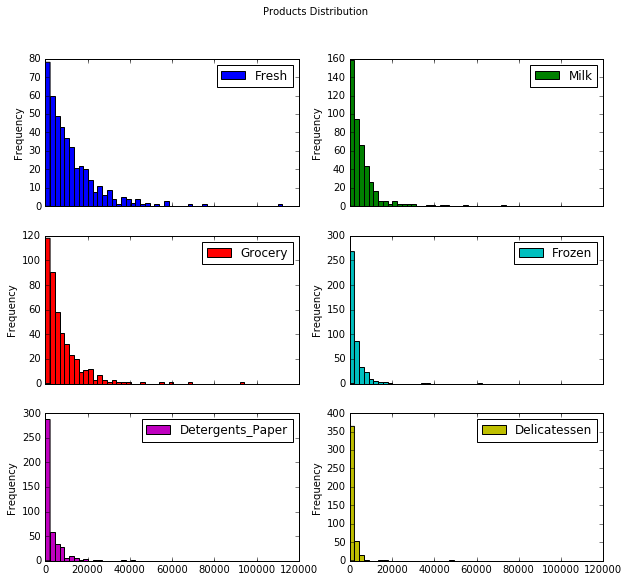

In [109]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.describe()  # Columns Summary
print data.head()  # Print first 5 rows
data.plot(kind='hist', bins=50,subplots=True,layout=(3,2), legend=True, figsize=(10,9),title='Products Distribution')

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Features in the dataset (in this case 6 different features) can be understood as independent dimensions in a N-Dimensional space where N=6. Data variance is not uniformelly distributed along the different dimensions and therefore are some directions that describe more data variance than others. PCA (Principal Components Analysis) is about coordinate transformations performed over the N-Dimensional space defined to reduce the number of dimensions by identifying those directions which more variance explain and use them as dimensions in the new K-Dimensional space defined, being K the number of components defined. 

In the following plot it is represented a 2-Dimensional space of points and the corresponding two dimensions from PCA: 

![](PCA.png)

Without actually analysing our current dataset, features with higher variance are: Fresh (std = 12647.3) and Grocery (std = 9503.2), so it is expected these two features have a deep impact in the firsts PCA components.

In contrast to PCA, ICA (Independent Component Analysis) is a powerful technique to separate independent sources linearly combined. ICA is not used for reducing dimensionality but for separating composed signals.

![](ICA.png)

In this case ICA tries to find the independent sources that linearly combined generate the different features, for this particular dataset this might be some kind of different shopping lists, consumption patterns or simply different types of customers. 


https://www.udacity.com/course/viewer#!/c-ud741/l-649069103/m-661438547

In this link [PCA versus ICA](http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html#example-decomposition-plot-ica-vs-pca-py) it is ilustrated with a geometrical example the main differences between both approximations: while PCA finds orthogonal directions in the raw feature space that correspond to directions accounting for maximum variance, ICA finds directions in the feature space corresponding to projections with high non-Gaussianity. These directions need not be orthogonal in the original feature space.

**NOTE**: Observations (Observations plot below) are generated through a linear combination of sources (True independent sources in the plot below)

![](PCAvrsICA.png)

ICA is oriented to identify the true dataset sources while PCA is oriented to reduce dimensions of the observation space.


## Data Preprocessing:

Standardization of datasets is a common requirement for many machine learning estimators implemented in the scikit; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. Both PCA and ICA calls for standardizations so data is transformed as required:

In [98]:
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 
print data_scaled.describe().loc[['mean','std']]

             Fresh          Milk       Grocery        Frozen  \
mean -2.422305e-17 -1.589638e-17 -6.030530e-17  1.135455e-17   
std   1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   

      Detergents_Paper  Delicatessen  
mean     -1.917658e-17 -8.276208e-17  
std       1.001138e+00  1.001138e+00  


# PCA

Following it is represented the first 6 compoments calculated with PCA and the corresponding explained variance:

In [99]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data_scaled)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.04288396 -0.54511832 -0.57925635 -0.05118859 -0.5486402  -0.24868198]
 [-0.52793212 -0.08316765  0.14608818 -0.61127764  0.25523316 -0.50420705]
 [-0.81225657  0.06038798 -0.10838401  0.17838615 -0.13619225  0.52390412]
 [-0.23668559 -0.08718991  0.10598745  0.76868266  0.17174406 -0.55206472]
 [ 0.04868278 -0.82657929  0.31499943  0.02793224  0.33964012  0.31470051]
 [ 0.03602539  0.03804019 -0.72174458  0.01563715  0.68589373  0.07513412]]
[ 0.44082893  0.283764    0.12334413  0.09395504  0.04761272  0.01049519]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

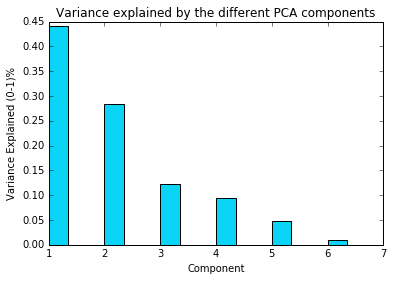

In [100]:
PCA_vars = pca.explained_variance_ratio_
ind = np.arange(1,len(PCA_vars) + 1)
width = 0.35
fig, ax = plt.subplots()
ax.bar(ind, PCA_vars, width, color='#0CD4F7')
ax.set_title('Variance explained by the different PCA components')
ax.set_ylabel('Variance Explained (0-1)%')
ax.set_xlabel('Component')

First two components explains 72% of the total variance (44% and 28% respectively) while third component represents a 12% and following components are below 10%. In order to simplify the number of features to use and loossing the minimum variance as possible, I select the first three components since explains 84% of the total variance.

**3)** What do the dimensions seem to represent? How can you use this information?

In [102]:
components_pca = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])
print components_pca

         Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
PC-1 -0.042884 -0.545118 -0.579256 -0.051189         -0.548640     -0.248682
PC-2 -0.527932 -0.083168  0.146088 -0.611278          0.255233     -0.504207
PC-3 -0.812257  0.060388 -0.108384  0.178386         -0.136192      0.523904
PC-4 -0.236686 -0.087190  0.105987  0.768683          0.171744     -0.552065
PC-5  0.048683 -0.826579  0.314999  0.027932          0.339640      0.314701
PC-6  0.036025  0.038040 -0.721745  0.015637          0.685894      0.075134


#### According to this result: 
 - First principal component is, mainly, inversely correlated with Grocery (-0.58), Milk (-0.54), Detergents_Paper (-0.55) and Delicatessen (-0.24)
 - Second principal component is, mainly, inversely correlated to Frozen (-0.61), Fresh (-0.53), Delicatessen (-0.5) and directly correlated with (0.25)
 - Third principal component is, mainly, inversely correlated with Fresh (-0.81) and directly correlated with Delicatessen (0.52)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d746fe290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d6f80f750>]], dtype=object)

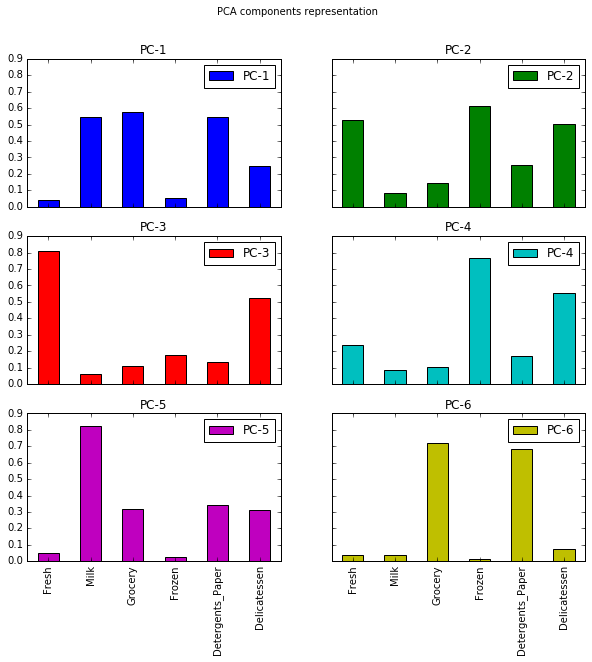

In [103]:
pca_scaled = pd.DataFrame(components_pca.transpose().abs()) 
pca_scaled.plot(kind='bar', subplots=True,layout=(3,2), legend=True, figsize=(10,9),sharey=True,title='PCA components representation')

# ICA

Following it is represented 6 ica compoments:

In [95]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(random_state=42)
ica.fit(data_scaled)
# Print the independent components
print ica.components_

[[-0.0109083  -0.00108579  0.00730777  0.05405594 -0.00254136 -0.01675677]
 [ 0.00253788 -0.0123283   0.06912878  0.00142375 -0.01374853 -0.00544097]
 [-0.00490605 -0.00153897 -0.00562146 -0.002525    0.00238444  0.05092947]
 [-0.00336282  0.01863001  0.10899024 -0.00723244 -0.13338644 -0.0160228 ]
 [-0.05026646  0.00647203  0.00748246  0.00322414 -0.01147139  0.0027079 ]
 [-0.00193854 -0.07245463  0.05647623  0.0016736  -0.0171404   0.01695592]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

In [96]:
components_df = pd.DataFrame(ica.components_,index = ['ica-1','ica-2','ica-3','ica-4','ica-5','ica-6'],columns=data_scaled.columns)
print components_df

          Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
ica-1 -0.010908 -0.001086  0.007308  0.054056         -0.002541     -0.016757
ica-2  0.002538 -0.012328  0.069129  0.001424         -0.013749     -0.005441
ica-3 -0.004906 -0.001539 -0.005621 -0.002525          0.002384      0.050929
ica-4 -0.003363  0.018630  0.108990 -0.007232         -0.133386     -0.016023
ica-5 -0.050266  0.006472  0.007482  0.003224         -0.011471      0.002708
ica-6 -0.001939 -0.072455  0.056476  0.001674         -0.017140      0.016956


Different components represents linear combinations of the different features and the unmixing matrix describes how are realated, higher coefficient values (in absolute magnitude) represents a higher contribution of the feature:
 - ica-1: Mostly includes Frozen products (0.05) and in lesser extent Delicatessen (-0.02) and Fresh (-0.01)
 - ica-2: Mostly Grocery (0.07) and in less proportion Milk and Detergents_Paper (both just over 0.01)
 - ica-3: Mostly (Exclusively) Delicatessen (0.05)
 - ica-4: Significantly Grocery (0.1) and Detergents_Paper (-0.13)
 - ica-5: Mostly Fresh (-0.05) and Detergents_Paper (-0.01)
 - ica-6: Mostly Milk (-0.07), Grocery (0.06) and in less porportion Detergents_Paper and Delicatessen (both just over 0.01)
 
In this particular case these components could be identified with different customers consumption patterns.

                     ica-1     ica-2     ica-3     ica-4     ica-5     ica-6
Fresh             0.010908  0.002538  0.004906  0.003363  0.050266  0.001939
Milk              0.001086  0.012328  0.001539  0.018630  0.006472  0.072455
Grocery           0.007308  0.069129  0.005621  0.108990  0.007482  0.056476
Frozen            0.054056  0.001424  0.002525  0.007232  0.003224  0.001674
Detergents_Paper  0.002541  0.013749  0.002384  0.133386  0.011471  0.017140
Delicatessen      0.016757  0.005441  0.050929  0.016023  0.002708  0.016956


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d6ea7e750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d6e8e1fd0>]], dtype=object)

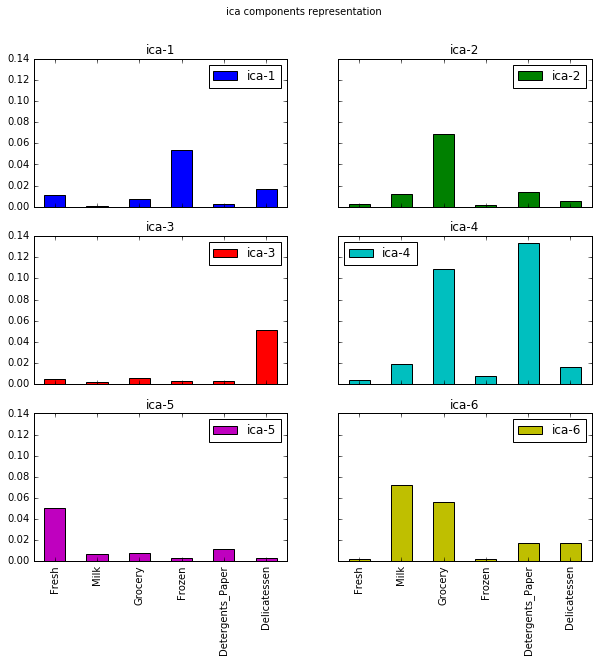

In [94]:
ica_scaled = pd.DataFrame(components_df.transpose().abs()) 
print ica_scaled
ica_scaled.plot(kind='bar', subplots=True,layout=(3,2), legend=True, figsize=(10,9),sharey=True,title='ica components representation')

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

K-means is a special case of Mixture of Gaussian, and Mixture model is a weighted combinations of probability distributions. One can think of mixture models as generalising k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. K-means define hard clusters, the samples are to be associated to the groups (subpopulations). 

Mixture models would let you determine these subpopulations, without associating each sample with a cluster. These subpopulations are defined by distributions with unknown parameters , for learning these parameters Expectation-Maximisation is to be used. Also there are weights for each of these distributions which are probabilities and hence sum to 1. With each sample there is a corresponding latent random variable each distributed according to a K-dimensional categorical distributions, K is the number of subpopulations.

Kmeans assign samples to clusters based on distances, while GMM assumes certain data distributions (mixture of a finite number of Gaussian distributions with unknown parameters) for these assigments. Since features in the dataset are not distributed following a Gaussian distribution, KMeans is the selected clustering methodology for this problem.  

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [110]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [111]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data_scaled)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


In [112]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(init='k-means++', n_clusters=4, n_init=10)
clusters.fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


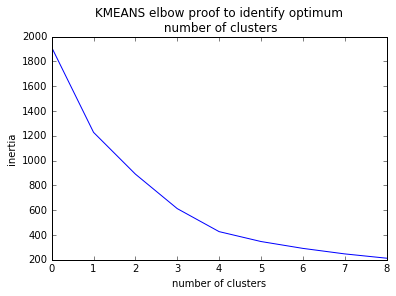

In [113]:
# Identify the optimum number of clusters:
def optimunCenters(data,max = 10):
    results = pd.DataFrame(columns=['NumberClusters','inertia'])
    n_row = 0
    for i in range(1,max):
        kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
        kmeans.fit(reduced_data)
        results.loc[n_row] = [i,kmeans.inertia_]
        n_row += 1
    results['inertia'].plot()
    plt.ylabel('inertia')
    plt.xlabel('number of clusters')
    plt.title('KMEANS elbow proof to identify optimum\n number of clusters')
    

optimunCenters(data,max = 10)

According to the graph above, there is no a clear number of cluster value, after number od clusters = 4 there seems to be a slighly trend change, so this is the number of clusters values used for Kmeans in this exercise. 

In [114]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [115]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids = clusters.cluster_centers_
print centroids

[[ -1.2547666    0.70658662]
 [  0.70030496  -0.16179975]
 [ -4.51308525 -10.04070335]
 [ -7.05027932   0.63634999]]


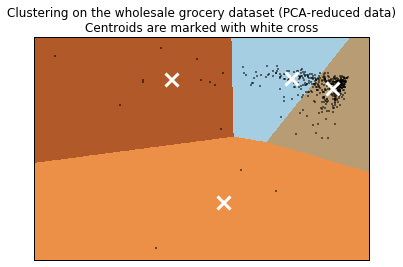

In [116]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Central objects represents centroids, which represents the average values of all samples assigned to each centroid.

Since the dimensional space is represented by two principal components, and principal components represent how  products are consumed, the different clusters represents how customers consume these products:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d6d477290>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d6d2dc510>], dtype=object)

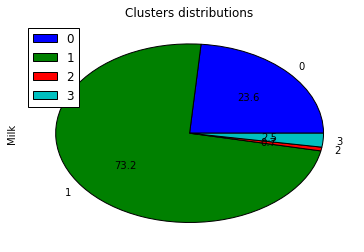

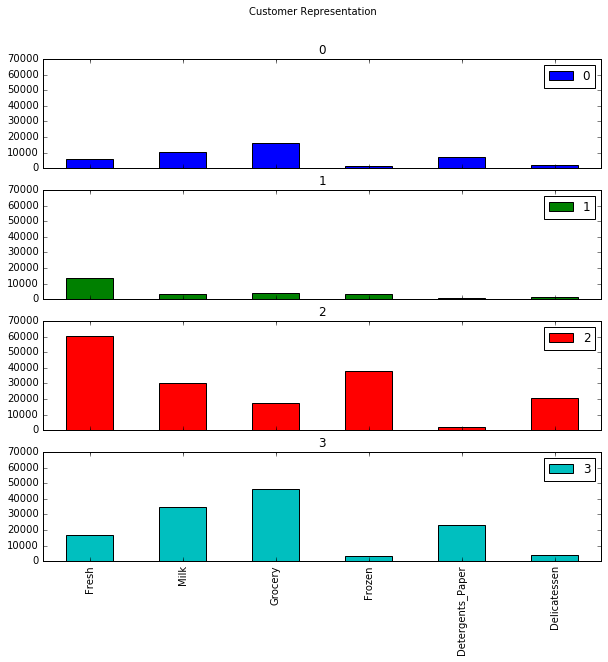

In [118]:
data['cluster'] = clusters.labels_
data.groupby('cluster').count().plot(kind='pie',y='Milk',title='Clusters distributions',autopct='%.1f')
data_grouped = data.groupby('cluster').mean()
data_grouped.T.plot(kind='bar', subplots=True, legend=True, figsize=(10,9),sharey=True,title='Customer Representation')

According to these results 74% of the customers are family run shops with a low consumption, most of them demand Fresh products for cluster 1 while Grocery products are more common in cluster 0. There is just 3.5% of customers are larger customers. 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

PCA was helpful to reduce dimensions and so facilitate the clustering process with Kmenas. In the other hand FastICA results are hard to work with since there is no a defined process to estimate the correct number of components (in PCA it is used the explained variance) and so decide a particular number of components for further clustering analysis.

**9)** How would you use that technique to help the company design new experiments?

PCA + KMeans help to create customer segmentations and so categorize customers. This information could be used to test any new experiment that potencially impacts customers. For example company now can perform test over a subset customers, selected samples for each available clusters. This could be used to estimate the new experiment's impact over the whole dataset.

**10)** How would you use that data to help you predict future customer needs?

Assigning samples to clusters that are well described with the different features, company now can implement a supervised machine learning model to decide whether a new customer belongs to each of the clusters generated.   